# Pattern recognition

&copy; 李浩东 3190104890@zju.edu.cn

- Pattern recognition
- `cvzone` and `mediapipe`

# Pattern recognition

![11](./images/pattern_recognition.jpg)


- Template matching is one of the most primitive and basic pattern recognition methods. It studies where the pattern of a specific object is located in the image, and then recognizes the object. This is a matching problem
- The principle of template matching is very similar to that of convolution
- The template ***slides*** from the origin on the original image, and the difference between the template and the image covered by the template is calculated.

(378, 668, 3)


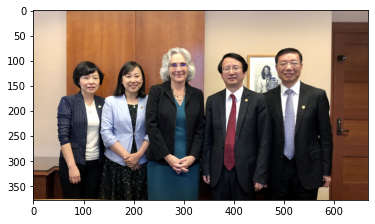

In [82]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mat_color

def read_image(path="./images/wu.jpg", flags=cv2.IMREAD_COLOR):
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(img_rgb.shape)
    return img_rgb

no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
img_wu = read_image()
plt.imshow(img_wu, norm=no_norm)

(66, 57, 3)


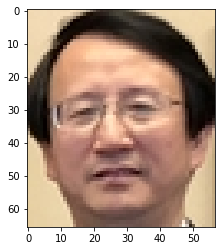

In [83]:
img_wu_tem = read_image("./images/wu_tem.jpg")
plt.imshow(img_wu_tem, norm=no_norm)

In [84]:
width, height = img_wu_tem.shape[0], img_wu_tem.shape[1]

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
           cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

def show_wu_face(mathod, color=(255, 0, 0)):
    plt.figure(figsize=(12, 4))
    res = cv2.matchTemplate(img_wu, img_wu_tem, mathod)
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap = 'gray')
    plt.subplot(1, 2, 2)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)    
    bottom_right = (top_left[0] + height, top_left[1] + width)
    img_wu_detect = cv2.rectangle(np.copy(img_wu), 
                                  top_left, bottom_right, color, 5)
    plt.imshow(img_wu_detect, norm=no_norm)

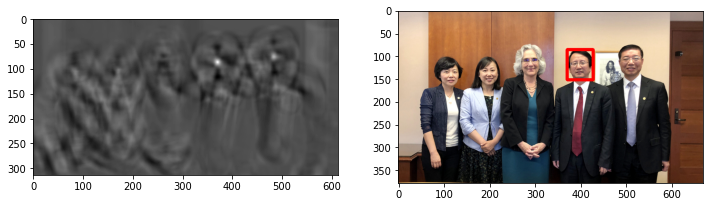

In [85]:
show_wu_face(methods[0])

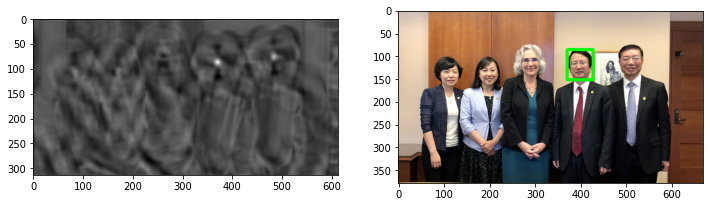

In [86]:
show_wu_face(methods[1], (0, 255, 0))

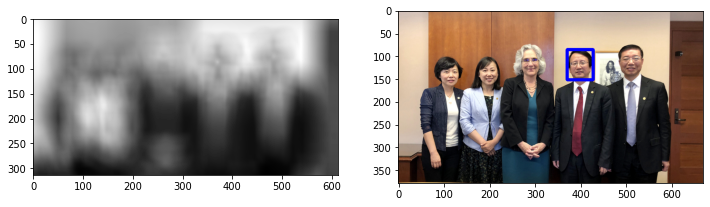

In [87]:
show_wu_face(methods[2], (0, 0, 255))

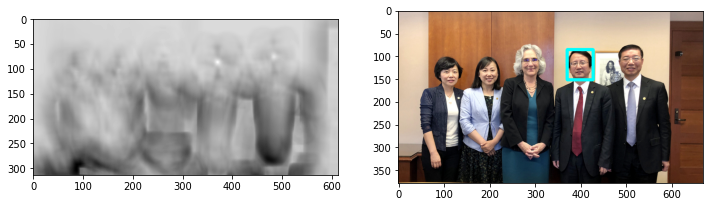

In [88]:
show_wu_face(methods[3], (0, 255, 255))

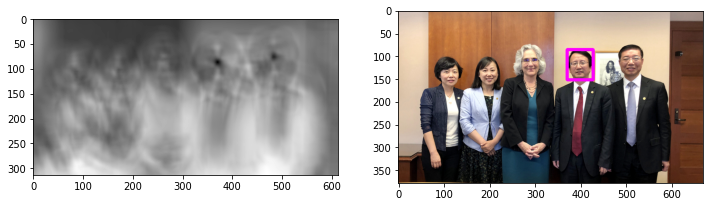

In [89]:
show_wu_face(methods[4], (255, 0, 255))

(900, 1600, 3)


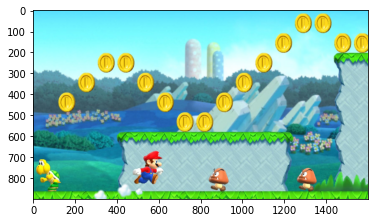

In [90]:
img_ma = read_image("./images/mario.jpg")
plt.imshow(img_ma, norm=no_norm)

(106, 91, 3)


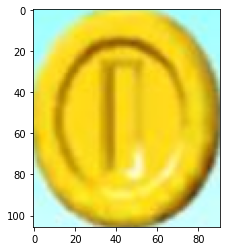

In [104]:
img_tem = read_image("./images/coin.png")
plt.imshow(img_tem, norm=no_norm)

In [109]:
width, height = img_tem.shape[0], img_tem.shape[1]

res = cv2.matchTemplate(img_ma, img_tem, cv2.TM_CCOEFF_NORMED)
threshold = 0.4
loc = np.where(res >= threshold)
img_ma_copy = np.copy(img_ma)
print(loc)
for pt in zip( * loc[::-1]):
    cv2.rectangle(img_ma_copy, pt, (pt[0] + height, pt[1] + width), (255, 0, 0), 3)

def show_mario(res, img):
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img, norm=no_norm)

(array([  0,   0,   0, ..., 488, 488, 488], dtype=int64), array([1238, 1239, 1240, ...,  774,  775,  776], dtype=int64))


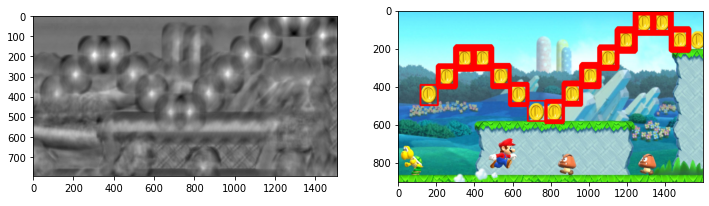

In [110]:
show_mario(res, img_ma_copy)

# `cvzone` and `mediapipe`

- [mediapipe link](https://google.github.io/mediapipe/)
- [cvzone link](https://www.computervision.zone/)
- [mediapipe github](https://github.com/cvzone/cvzone)
- [cvzone github](https://github.com/google/mediapipe)


# The End

2022.4